# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/)

Inkubator Uniwersytetu Warszawskiego

## 7. Random Forest Classification

Same dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance

* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html)
* [Random Forest](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)
* [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
students = pd.read_csv("data/students_cleaner.csv")

In [3]:
# good grade
students["G"] = students["G1"] + students["G2"] + students["G3"]
students["good_G"] = students["G"] > students["G"].mean()

In [4]:
X = students.drop(['G', 'good_G', 'G1', 'G2', 'G3'], axis='columns')
Y = students['good_G']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
# more or less 50-50
Y.mean()

0.50539291217257321

In [6]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
# accuracy on the training dataset
rf_clf.score(X_train, Y_train)

1.0

In [8]:
# accuracy on the test dataset
rf_clf.score(X_test, Y_test)

0.66871165644171782

Text(52,0.5,'ground_truth')

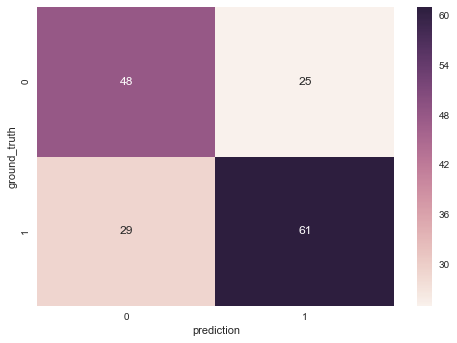

In [9]:
sns.heatmap(confusion_matrix(Y_test, rf_clf.predict(X_test)), annot=True, fmt='d')
plt.xlabel("prediction")
plt.ylabel("ground_truth")

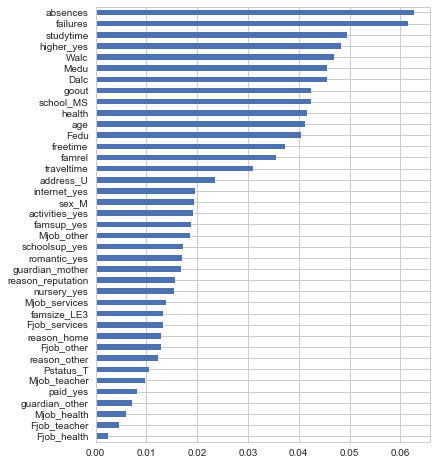

In [10]:
pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values().plot('barh', figsize=(6, 8))

In [ ]:
# Talk also about:
# Cross Validation
# Grid Search

In [12]:
from sklearn.model_selection import cross_val_score

In [20]:
rf_clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_clf, X, Y, cv=10)
print("{:.1f}% +- {:.1f}%".format(100 * scores.mean(), 100 * scores.std()))

68.3% +- 9.4%


In [19]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(C=0.01)
scores = cross_val_score(lr_clf, X, Y, cv=10)
print("{:.1f}% +- {:.1f}%".format(100 * scores.mean(), 100 * scores.std()))

71.5% +- 9.3%
